# Exploratory Data Analysis

In [20]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fileCounter(directory: str):
    lst = os.listdir(directory)
    fileCount = len(lst)
    
    return fileCount

In [3]:
trainingPizzaPath = 'pizza-notpizza/train/pizza'
trainingNotPizzaPath = 'pizza-notpizza/train/not_pizza'

validationPizzaPath = 'pizza-notpizza/val/pizza'
validationNotPizzaPath = 'pizza-notpizza/val/not_pizza'

testingPizzaPath = 'pizza-notpizza/test/pizza'
testingNotPizzaPath = 'pizza-notpizza/test/not_pizza'

In [4]:
trainPizzaCount = fileCounter(trainingPizzaPath)
trainNotPizzaCount = fileCounter(trainingNotPizzaPath)

training = [trainPizzaCount, trainNotPizzaCount]
training

[786, 786]

In [5]:
valPizzaCount = fileCounter(validationPizzaPath)
valNotPizzaCount = fileCounter(validationNotPizzaPath)

validation = [valPizzaCount, valNotPizzaCount]
validation

[98, 98]

In [6]:
testPizzaCount = fileCounter(testingPizzaPath)
testNotPizzaCount = fileCounter(testingNotPizzaPath)

testing = [testPizzaCount, testNotPizzaCount]
testing

[99, 99]

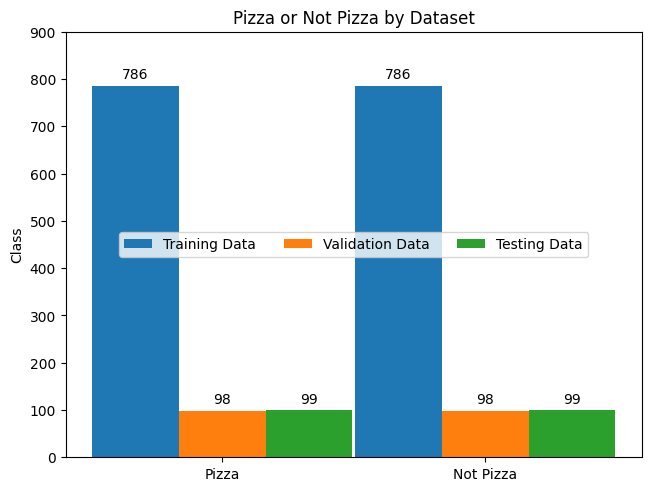

In [7]:
classes = ['Pizza', 'Not Pizza']
classesCount = {
    'Training Data': training,
    'Validation Data': validation,
    'Testing Data': testing
}

x = np.arange(len(classes))
width = 0.33
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for dataset, eachClassCount in classesCount.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, eachClassCount, width, label = dataset)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Quantity')
ax.set_ylabel('Class')
ax.set_title('Pizza or Not Pizza by Dataset')
ax.set_xticks(x + width, classes)
ax.legend(loc = 'center', ncols = 3)
ax.set_ylim(0, 900)

plt.show()

# First attepmt to train
- Lasso Regularization
- CNN Network
- 3 x 256 x 256 input size

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms.functional as F
from torchvision.transforms import v2

import torchmetrics as metrics

from sklearn.metrics import confusion_matrix, classification_report

In [9]:
trainData = 'pizza-notpizza/train'
valData = 'pizza-notpizza/val'
testData = 'pizza-notpizza/test'

In [10]:
trainTransforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

valTestTransforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

trainDataset = datasets.ImageFolder(trainData, transform=trainTransforms)
valDataset = datasets.ImageFolder(valData, transform=valTestTransforms)
testDataset = datasets.ImageFolder(testData, transform=valTestTransforms)

In [11]:
class_to_idx = trainDataset.class_to_idx

for label, value in class_to_idx.items():
    print(f'Class Name: {label}, Numeric Value: {value}')

Class Name: not_pizza, Numeric Value: 0
Class Name: pizza, Numeric Value: 1


In [12]:
trainDataset[3]

(tensor([[[-0.9922, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9373, -0.9373, -0.9294,  ..., -0.9843, -0.9843, -0.9922],
          ...,
          [-0.7176, -0.7020, -0.7098,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9608, -0.9686, -0.9608,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -0.9922, -0.9843,  ..., -0.9922, -0.9922, -0.9922]],
 
         [[-0.9922, -0.9843, -0.9843,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9765, -0.9686, -0.9686,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.8275, -0.8196, -0.8196,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -1.0000, -0.9922,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9843, -0.9922, -0.9765,  ..., -0.9922, -0.9922, -0.9922]],
 
         [[-0.9765, -0.9765, -0.9765,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -0.9922,

In [13]:
BATCH_SIZE = 16
NUM_WORKERS = 4
LEARNING_RATE = 0.0025
WEIGHT_DECAY = 1e-5

In [14]:
trainLoader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
valLoader = torch.utils.data.DataLoader(valDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
testLoader = torch.utils.data.DataLoader(testDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)
        
        self.dropout = nn.Dropout(0.6)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.pool(nn.functional.leaky_relu(self.conv1(x)))
        x = self.pool(nn.functional.leaky_relu(self.conv2(x)))
        x = self.pool(nn.functional.leaky_relu(self.conv3(x)))
        
        x = x.view(x.size(0), -1)
        
        x = nn.functional.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [16]:
model = CNN()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

trainLossHistory = []
trainAccHistory = []

for epoch in range(50):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if i % 1000 == 999:
            print(f'[{epoch + 1}, {i + 1} Loss: {running_loss / 1000}]')
            running_loss = 0.0
            
    epoch_loss = running_loss / len(trainLoader)
    epoch_acc = 100 * correct / total
    trainLossHistory.append(epoch_loss)
    trainAccHistory.append(epoch_acc)
    
    print(f'=== EPOCH [{epoch + 1}]===\n    Loss: {epoch_loss} Accuracy: {epoch_acc}')
    
print('FINISHED TRAINING!')

=== EPOCH [1]===
    Loss: 0.7861540185080634 Accuracy: 52.86259541984733
=== EPOCH [2]===
    Loss: 0.6820587557975692 Accuracy: 59.79643765903308
=== EPOCH [3]===
    Loss: 0.6685600927983871 Accuracy: 62.340966921119595
=== EPOCH [4]===
    Loss: 0.6591628804953411 Accuracy: 63.295165394402034
=== EPOCH [5]===
    Loss: 0.6442307333151499 Accuracy: 66.2849872773537
=== EPOCH [6]===
    Loss: 0.6342445319951183 Accuracy: 67.74809160305344
=== EPOCH [7]===
    Loss: 0.645527414300225 Accuracy: 66.15776081424936
=== EPOCH [8]===
    Loss: 0.6658928183594135 Accuracy: 67.74809160305344
=== EPOCH [9]===
    Loss: 0.6692527764373355 Accuracy: 63.74045801526717
=== EPOCH [10]===
    Loss: 0.6518456526476928 Accuracy: 65.96692111959288
=== EPOCH [11]===
    Loss: 0.6311845403126995 Accuracy: 67.49363867684478
=== EPOCH [12]===
    Loss: 0.6287412309285366 Accuracy: 67.30279898218829
=== EPOCH [13]===
    Loss: 0.6375436268069528 Accuracy: 68.38422391857506
=== EPOCH [14]===
    Loss: 0.5713

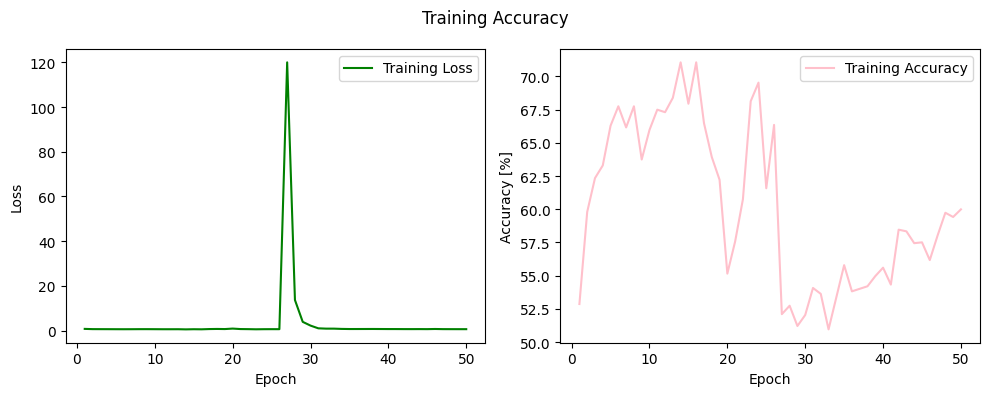

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(trainLossHistory) + 1), trainLossHistory, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainAccHistory) + 1), trainAccHistory, color='pink', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')
plt.suptitle('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in valLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        
acc = 100 * correct / total

print('Accuracy of the network on the test images: %d %%' % acc)

Accuracy of the network on the test images: 46 %


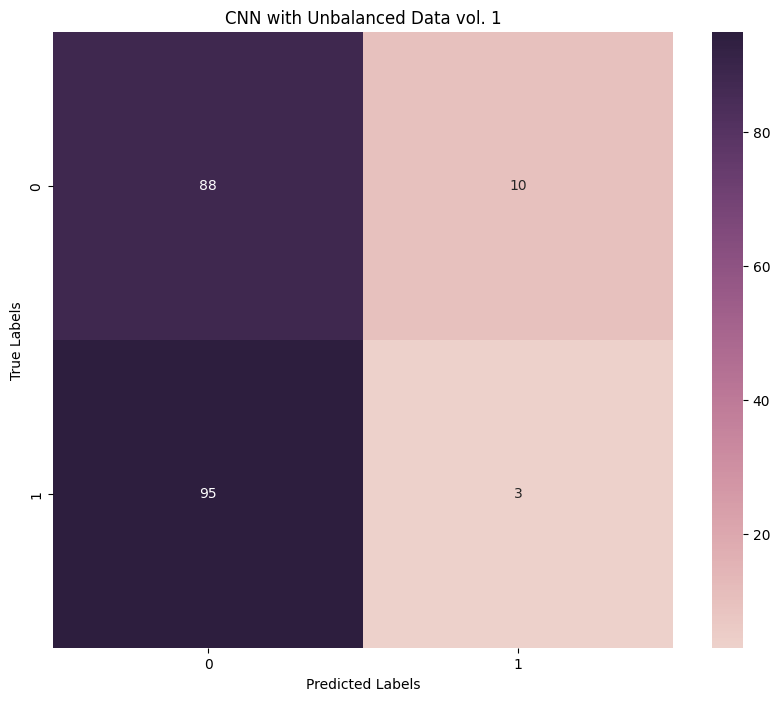

In [22]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

class_names = [str(i) for i in range(2)]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN with Unbalanced Data vol. 1')
plt.savefig('conf_matrix_cnn1.png')

plt.show()

In [23]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.90      0.63        98
           1       0.23      0.03      0.05        98

    accuracy                           0.46       196
   macro avg       0.36      0.46      0.34       196
weighted avg       0.36      0.46      0.34       196



In [25]:
f1 = metrics.classification.BinaryF1Score()
f1_score = f1(torch.tensor(predicted_labels), torch.tensor(true_labels))
prec = metrics.classification.BinaryPrecision()
precision = prec(torch.tensor(predicted_labels), torch.tensor(true_labels))
rec = metrics.classification.BinaryRecall()
recall = rec(torch.tensor(predicted_labels), torch.tensor(true_labels))

print(f'F1-Score: {f1_score * 100}, Precision: {precision * 100}, Recall: {recall * 100}')

F1-Score: 5.405405521392822, Precision: 23.076923370361328, Recall: 3.0612244606018066


In [26]:
from torchvision.models import efficientnet_b0

## EfficientNet + Data Augmentation
Data Augmentations:
- Flips (Horizontal and Vertical)
- Rotation
- Color Gitter

Additionaly:
- Normalization

In [28]:
trainTransforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.5, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

trainDataset = datasets.ImageFolder(trainData, transform=trainTransforms)

In [29]:
trainLoader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [36]:
class EfficientNet(nn.Module):
    def __init__(self):
        super(EfficientNet, self).__init__()
        self.model = efficientnet_b0(pretrained = True)
        self.model.classifier = nn.Sequential(
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(self.model.classifier[1].in_features, 1)  # Adjusted for binary classification
        )
        self.leaky_relu = nn.LeakyReLU()
        
    def forward(self, x):
        x = self.model(x)
        x = self.leaky_relu(x)
        
        return x

In [40]:
model = EfficientNet()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

trainLossHistory = []
trainAccHistory = []

for epoch in range(50):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        labels = torch.tensor(labels, dtype=torch.float32)
        inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if i % 1000 == 999:
            print(f'[{epoch + 1}, {i + 1} Loss: {running_loss / 1000}]')
            running_loss = 0.0
            
    epoch_loss = running_loss / len(trainLoader)
    epoch_acc = 100 * correct / total
    trainLossHistory.append(epoch_loss)
    trainAccHistory.append(epoch_acc)
    
    print(f'=== EPOCH [{epoch + 1}]===\n    Loss: {epoch_loss} Accuracy: {epoch_acc}')
    
print('FINISHED TRAINING!')

/Users/zuzux/Documents/Uni/Projects/WTUM/wtum/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/zuzux/Documents/Uni/Projects/WTUM/wtum/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/var/folders/5z/kr2ym7nj6t5096sqwq9byhsw0000gn/T/ipykernel_64776/3683477769.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = tor